In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')

<Axes: >

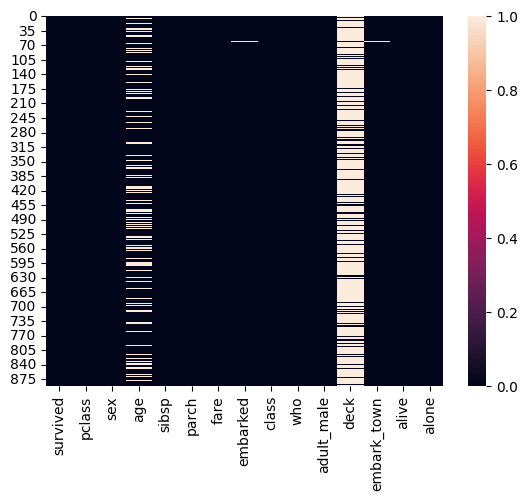

In [4]:
sns.heatmap(df.isnull())

<Axes: >

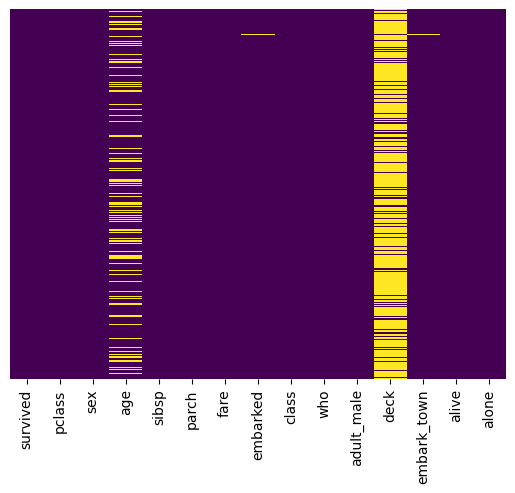

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.drop(columns='deck',inplace=True)
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<Axes: xlabel='survived', ylabel='age'>

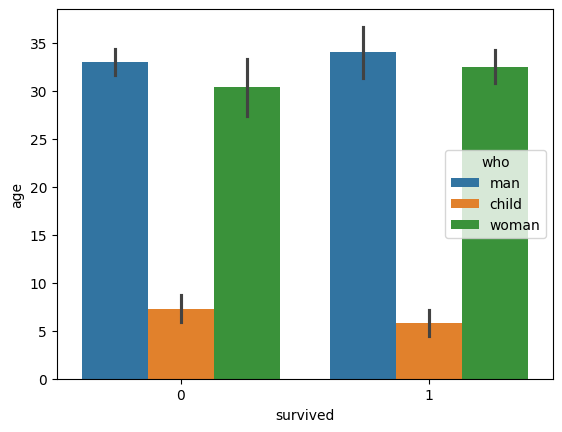

In [7]:
sns.barplot(data=df,x='survived',y='age',hue='who')

<Axes: xlabel='age', ylabel='Count'>

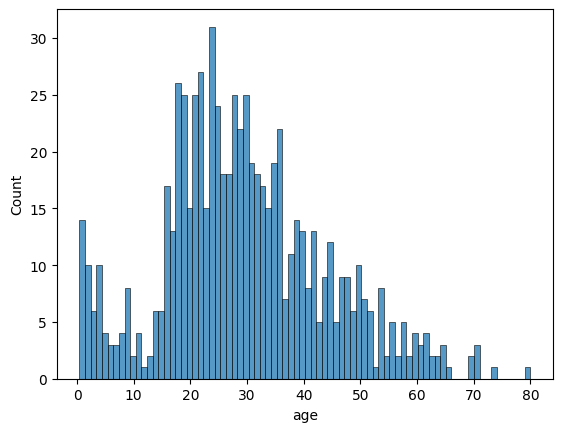

In [8]:
# data distribution
sns.histplot(data=df, x='age',bins=80)

<Axes: >

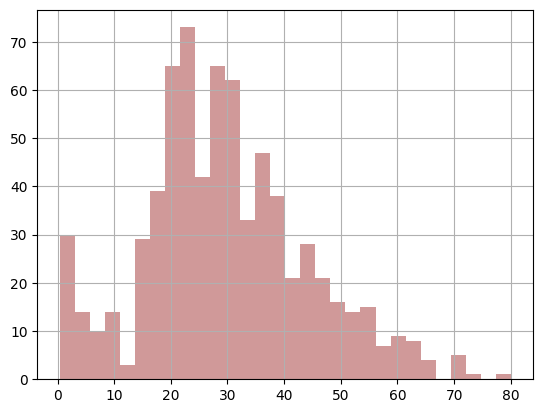

In [19]:
df['age'].hist(bins=30,color='darkred',alpha=0.4)

<Axes: xlabel='survived', ylabel='age'>

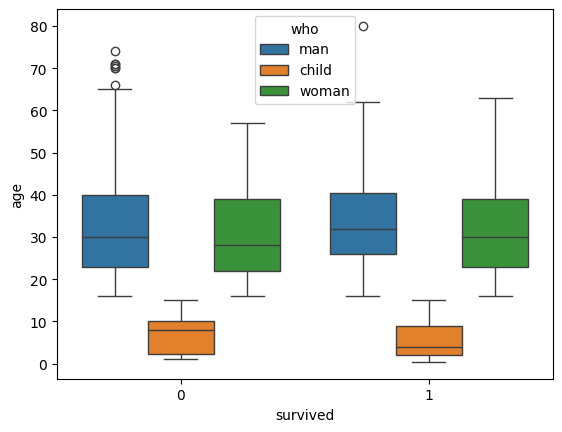

In [26]:
sns.boxplot(data=df, y='age', x='survived',hue='who')

(0.0, 270.0)

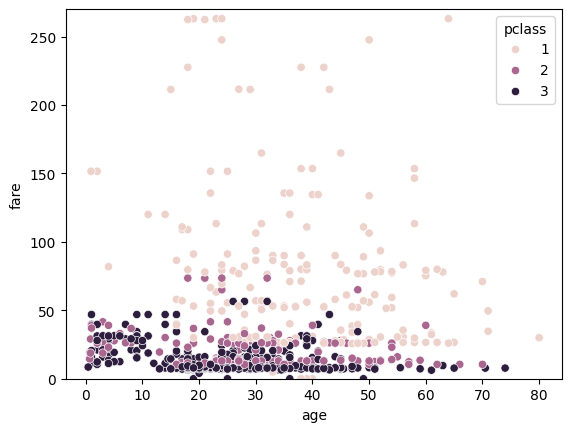

In [31]:
sns.scatterplot(x='age',y='fare',data=df,hue='pclass')
plt.ylim(0,270)

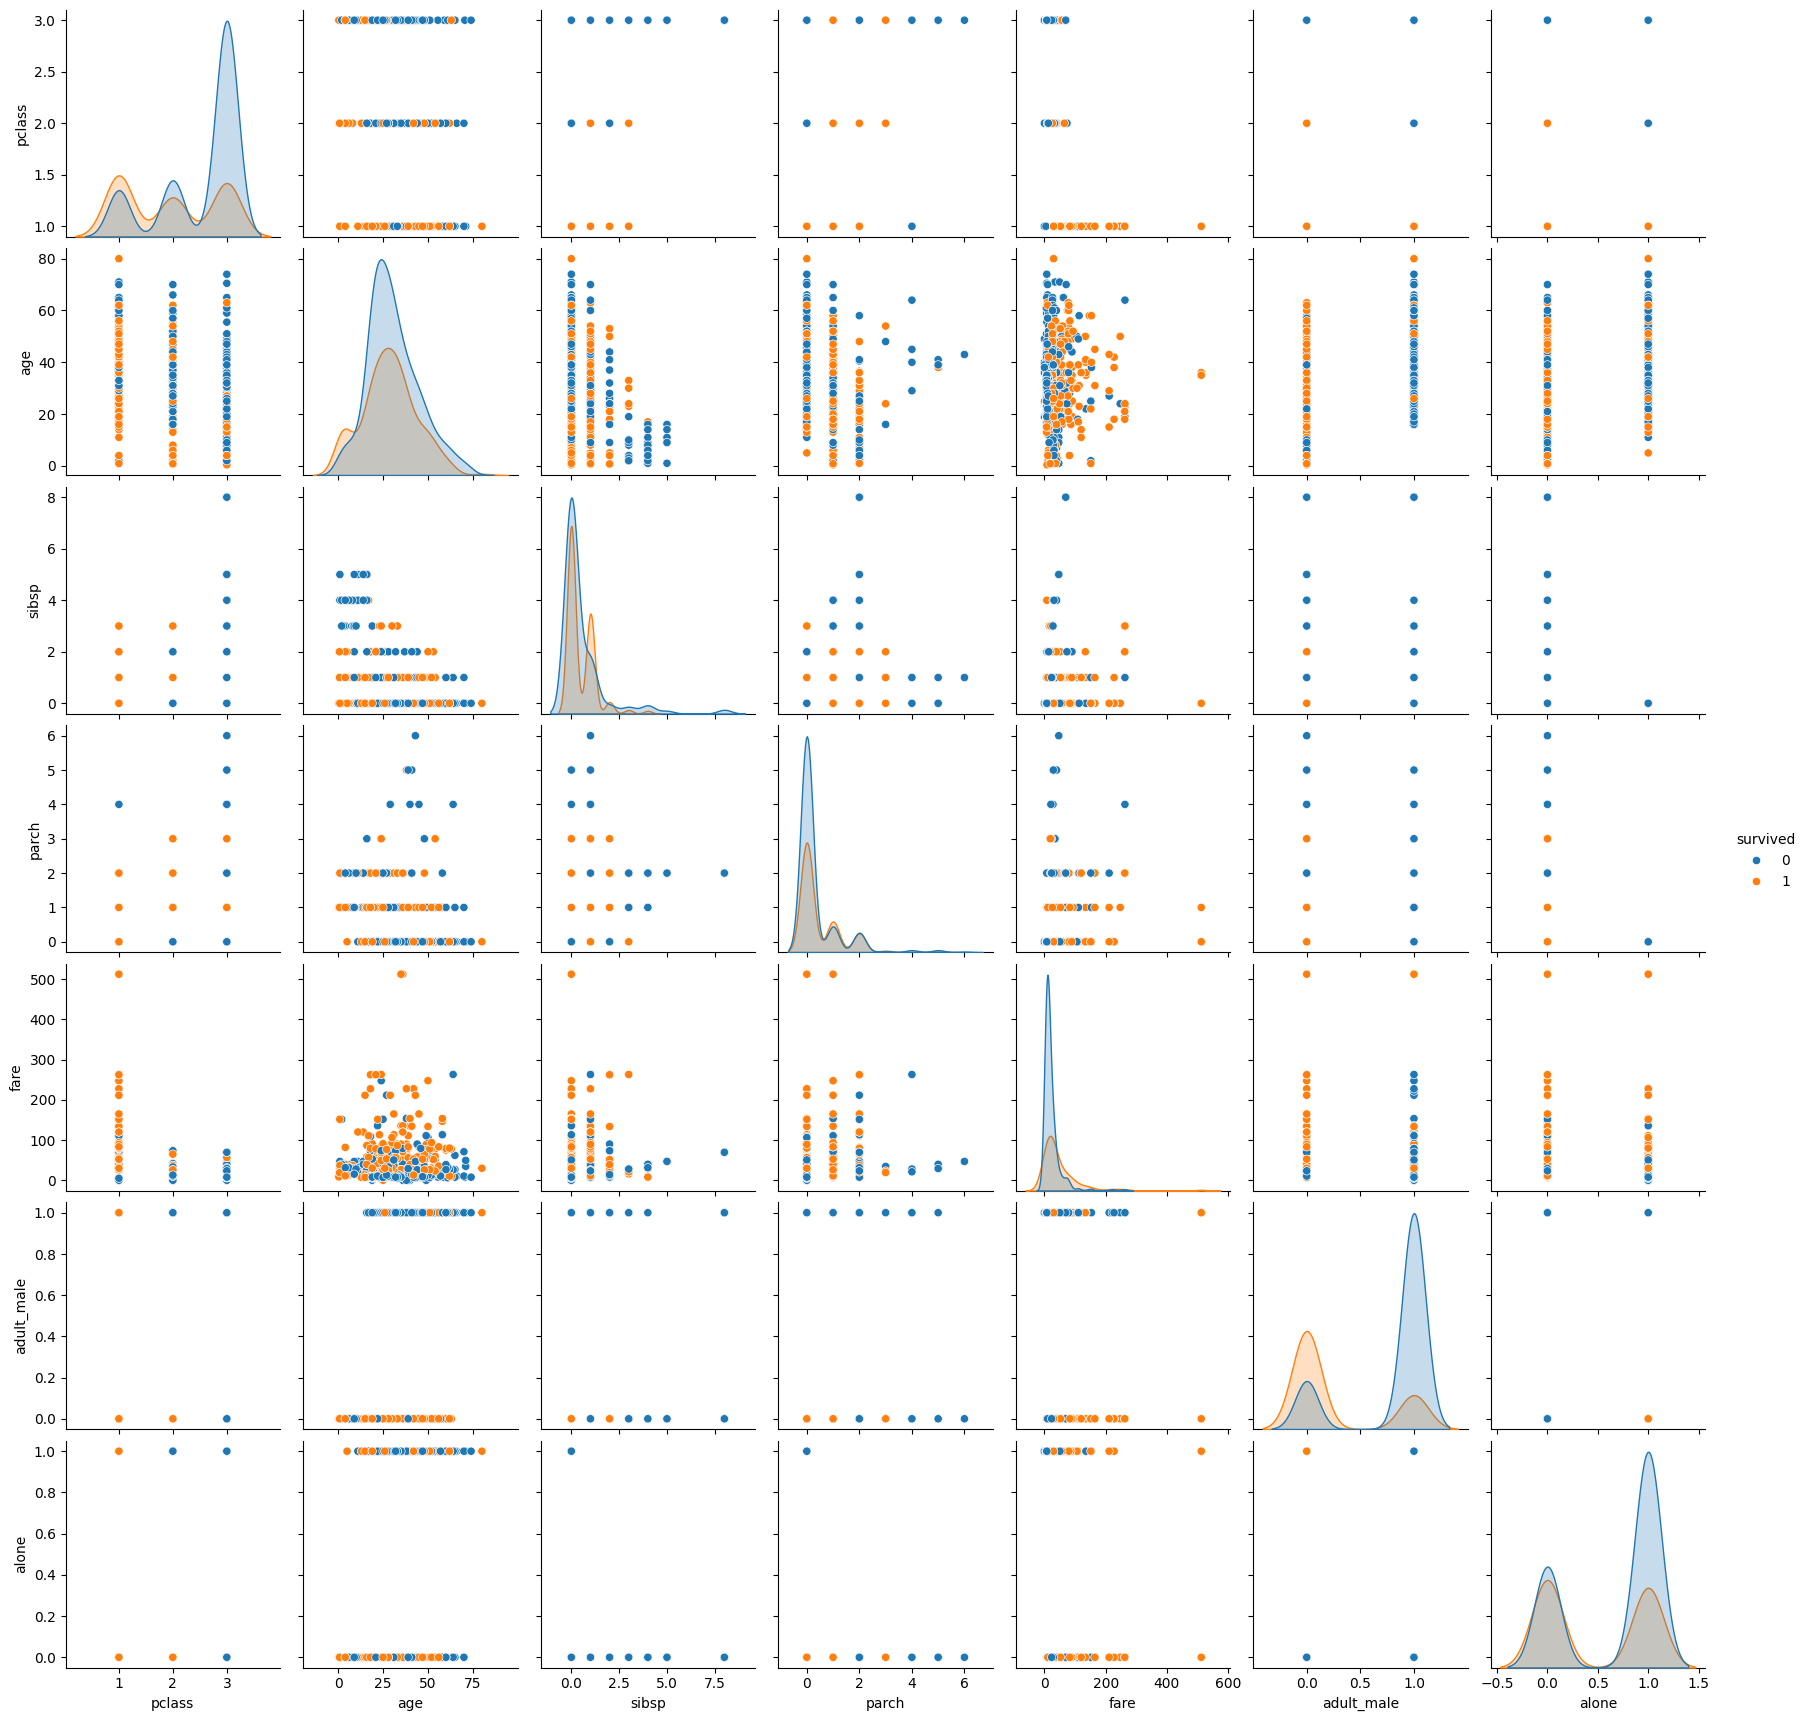

In [32]:
# pari plot with respect to survived column
sns.pairplot(df,hue='survived')

<Axes: xlabel='pclass'>

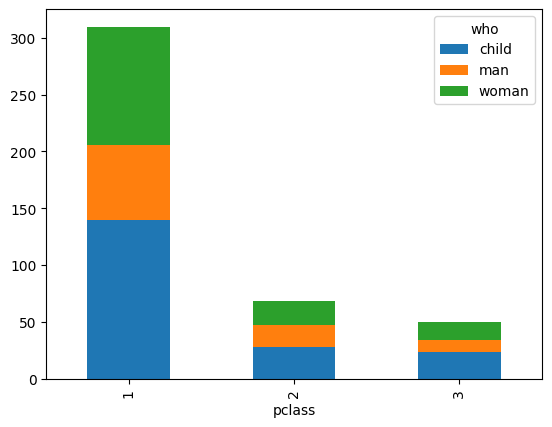

In [35]:
# stacked barplot
df.groupby(['pclass','who'])['fare'].mean().unstack().plot(kind='bar',stacked=True)

<Axes: xlabel='survived', ylabel='age'>

c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


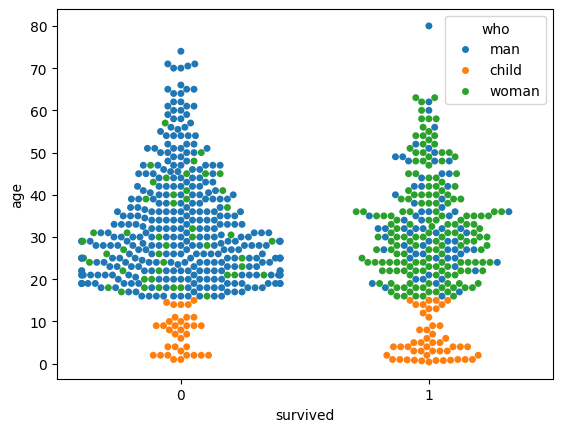

In [38]:
# swarm
sns.swarmplot(data=df,x='survived',y='age',hue='who')

<Axes: xlabel='pclass', ylabel='fare'>

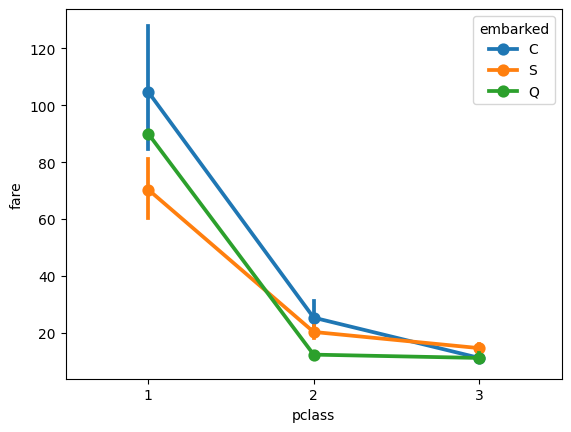

In [40]:
sns.pointplot(x='pclass',y='fare',hue='embarked',data=df)

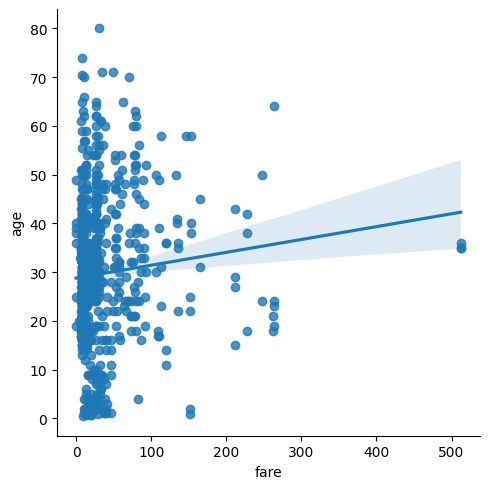

In [41]:
# to check relation of two numeric variables
sns.lmplot(x='fare',y='age',data=df)

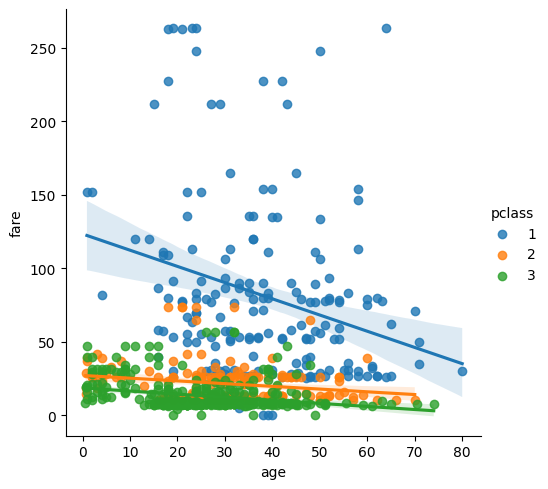

In [44]:
# Filter the DataFrame to include only 'age' values less than 300
filtered_df = df[df['fare'] < 300]

# Create the lmplot using the filtered DataFrame
sns.lmplot(y='fare', x='age', hue='pclass',data=filtered_df)

In [45]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [46]:
df['age_groups'] = pd.cut(df['age'],[0,10,18,30,50,80],
                          labels=['kids','teen','youth','middle age','old'])

In [47]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,youth
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,middle age
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,youth
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,middle age
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,middle age


C:\Users\Asim Mehdi\AppData\Local\Temp\ipykernel_84712\3917584871.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_groups')['fare'].mean().plot(kind='bar')


<Axes: xlabel='age_groups'>

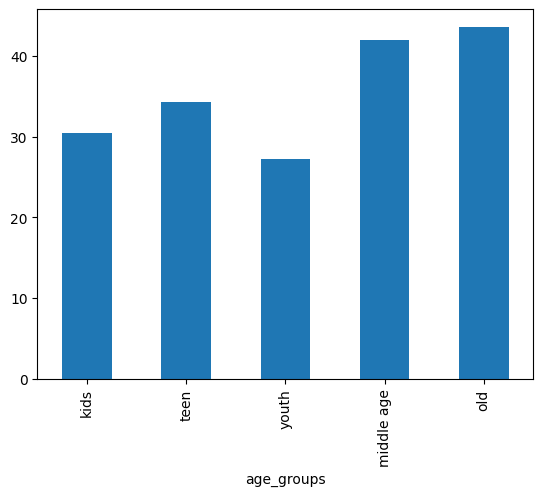

In [49]:
df.groupby('age_groups')['fare'].mean().plot(kind='bar')

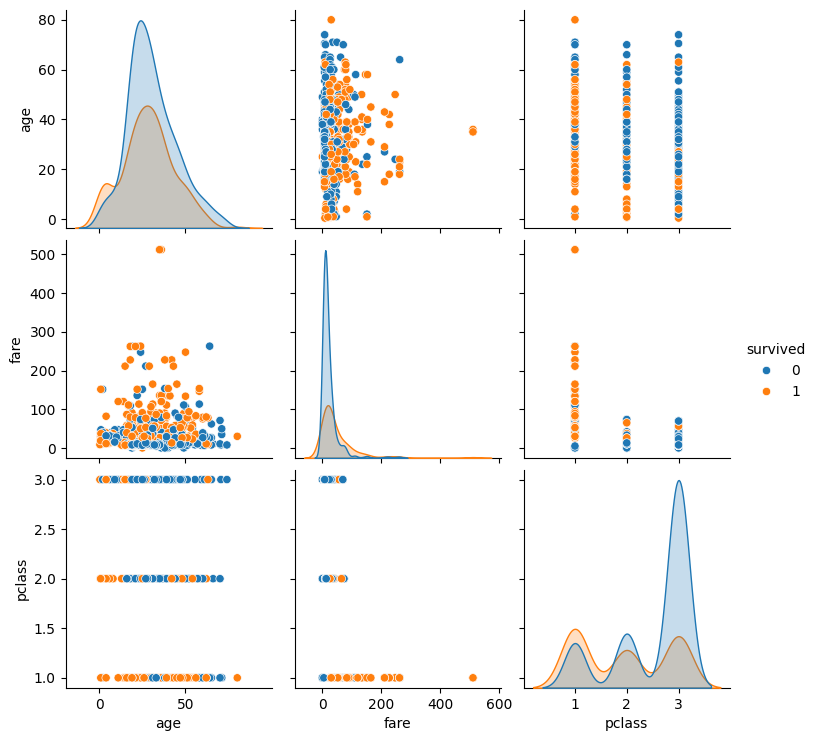

In [53]:
sns.pairplot(df, hue='survived',vars=['age','fare','pclass'])